In [11]:
library(ggplot2)
library(tidyverse)
library(openxlsx)
library(grid)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


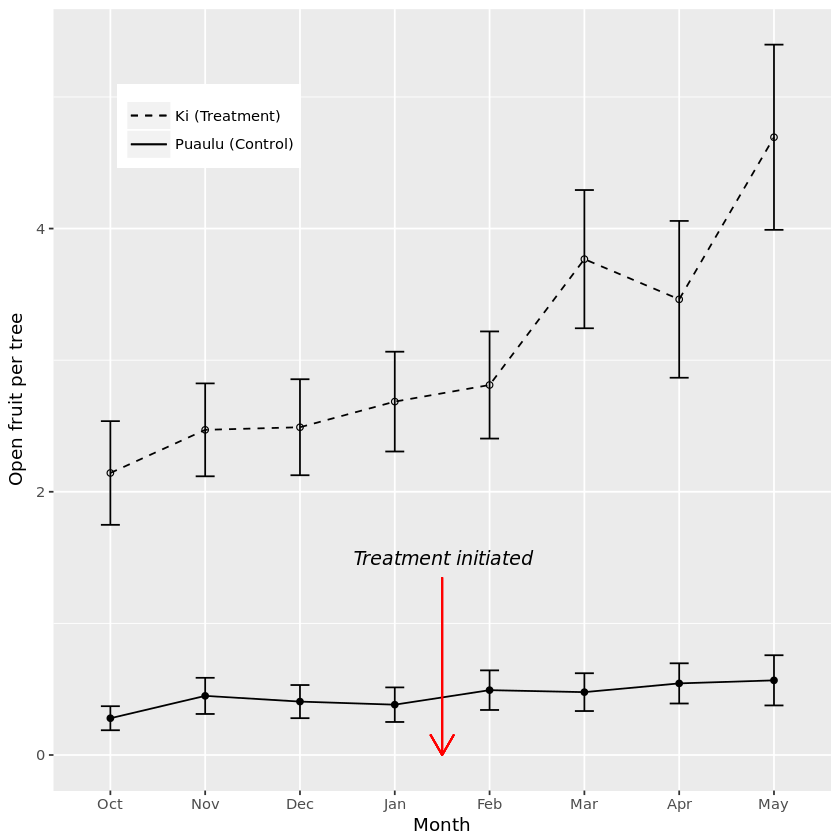

In [13]:
download.file(url = "https://ndownloader.figshare.com/files/13682435", destfile = "data.xlsx", mode="wb")
dataTreatment = read.xlsx("data.xlsx", sheet = "OPENFRUIT_TREATMENT")
dataControl = read.xlsx("data.xlsx", sheet = "OPEN FRUIT_CONTROL")

months = c("Oct","Nov","Dec","Jan","Feb","Mar","Apr","May")

tidyDataTreatment = select(dataTreatment, -HauKuahiwi_ID) %>% 
  rename(Oct = Ki_frt_Oct) %>%
  rename(Nov = Ki_frt_Nov) %>%
  rename(Dec = Ki_frt_Dec) %>%
  rename(Jan = Ki_frt_Jan) %>%
  rename(Feb = Ki_frt_Feb) %>%
  rename(Mar = Ki_frt_Mar) %>%
  rename(Apr = Ki_frt_Apr) %>%
  rename(May = Ki_frt_May) %>%
  gather(key = month, value = fruitTreatment) %>%
  mutate(month = factor(month, levels = months))

tidyDataControl = filter(dataControl, !is.na(HauKuahiwi_ID)) %>%
  select(-HauKuahiwi_ID) %>% 
  rename(Oct = Puaulu_frt_Oct) %>%
  rename(Nov = Puaulu_frt_Nov) %>%
  rename(Dec = Puaulu_frt_Dec) %>%
  rename(Jan = Puaulu_frt_Jan) %>%
  rename(Feb = Puaulu_frt_Feb) %>%
  rename(Mar = Puaulu_frt_Mar) %>%
  rename(Apr = Puaulu_frt_Apr) %>%
  rename(May = Puaulu_frt_May) %>%
  gather(key = month, value = fruitControl) %>%
  mutate(month = factor(month, levels = months))

treatmentSummary = group_by(tidyDataTreatment, month) %>%
  summarise(meanFruitTreatment = mean(fruitTreatment, na.rm = TRUE),
            sdFruitTreatment = sd(fruitTreatment, na.rm = TRUE) / sqrt(length(fruitTreatment)))

controlSummary = group_by(tidyDataControl, month) %>%
  summarise(meanFruitControl = mean(fruitControl, na.rm = TRUE),
            sdFruitControl = sd(fruitControl, na.rm = TRUE) / sqrt(length(fruitControl)))

combinedSummaries = left_join(treatmentSummary, controlSummary, by = "month")


ggplot(combinedSummaries, aes(x = month)) +
  
  geom_point(shape = 1,
             aes(y = meanFruitTreatment)) +
  geom_line(group = 1,
            aes(y = meanFruitTreatment,
                linetype = "Ki (Treatment)")) +
  geom_errorbar(aes(ymin = meanFruitTreatment - sdFruitTreatment,
                    ymax = meanFruitTreatment + sdFruitTreatment),
                width=.2,
                position=position_dodge(.9)) +
  
  geom_point(aes(y = meanFruitControl)) +
  geom_line(group = 1,
            aes(y = meanFruitControl,
                linetype = "Puaulu (Control)")) +
  geom_errorbar(aes(ymin = meanFruitControl - sdFruitControl,
                    ymax = meanFruitControl + sdFruitControl),
                width=.2,
                position=position_dodge(.9)) +
  
  geom_segment(aes(x = 4.5, y = 1.35, xend = 4.5, yend = 0),
               arrow = arrow(length = unit(0.5, "cm")),
               color = "red") +
  annotate("text", x = 4.5, 
           y = 1.5, 
           label = "Treatment initiated", 
           size=4,
           fontface = "italic") +
  
  scale_linetype_manual("",
                        breaks = c("Ki (Treatment)","Puaulu (Control)"),
                        values = c("dashed","solid")) +
  labs(x = "Month",
       y = "Open fruit per tree") +
  theme(legend.position = c(.2,.85),
        legend.key.width = unit(.95, "cm"),
        legend.title = element_blank())
  